## Hospital Readmission of Diabetes

In [1]:
import dill
dill.load_session('diabetes_env.db')

In [77]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import os

In [ ]:
# from Medium
from statistics import mode
from matplotlib import style
from matplotlib import pyplot as plt
import itertools

In [1]:
cwd = os.getcwd()
dataset_directory_path = "/1. Dataset_diabetes"
dataset_file_path = "/diabetic_data.csv"

dataset = pd.read_csv(cwd + dataset_directory_path + dataset_file_path)
df = dataset.copy(deep=True)

dataset.shape

(101766, 50)


In [71]:
pd.options.display.max_rows = 10

In [2]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [3]:
print(dataset.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [4]:
df_cate = df.select_dtypes(include='object')
missing_NA_columns = df_cate.loc[:, df_cate.isin(["?", 'Unknown/Invalid']).any()]
missing_NA_columns.isin(["?", 'Unknown/Invalid']).sum()

race                  2273
gender                   3
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

In [7]:
missing_NA_columns

,race,gender,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3
0,Caucasian,Female,?,?,Pediatrics-Endocrinology,250.83,?,?
1,Caucasian,Female,?,?,?,276,250.01,255
2,AfricanAmerican,Female,?,?,?,648,250,V27
3,Caucasian,Male,?,?,?,8,250.43,403
4,Caucasian,Male,?,?,?,197,157,250
5,Caucasian,Male,?,?,?,414,411,250
6,Caucasian,Male,?,?,?,414,411,V45
7,Caucasian,Male,?,?,?,428,492,250
8,Caucasian,Female,?,?,?,398,427,38
9,Caucasian,Female,?,?,InternalMedicine,434,198,486


- **Weight is missing in over 98% records. Owing to the poor interpretability of missing values and little predictive generalizability to other patients, best thing is to just drop it.**
- **Payer code and Medical Specialty of treating physician also have 40–50% missing values. We decided to drop these, but there are other ways too to deal with such missing values.**

In [9]:
df_cleaned = df.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)
df_cleaned

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


- **Primary (diag_1), Secondary (diag_2) and Additional (diag_3) diagnoses were have very few missing values. Technically, if all three are missing, that’s bad data. So we only drop those records where all three diagnoses are missing.**
- **Gender has only 3 missing or invalid values so we decided to drop these records.**
- **Also, one more cleaning step that depends on understanding the data and some common sense: since we are trying to predict readmissions, those patients who died during this hospital admission, have zero probability of readmission. So we should remove those records (discharge_disposition = 11).**

In [11]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
# drop_Idx = drop_Idx.union(set(df[df['diag_1'] == '?'].index)) # remove the diag_1 = ? either, why?


{87181}

In [12]:
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
drop_Idx

{30506, 75551, 82573, 87181}

In [13]:
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx

{81922,
 49155,
 69639,
 8200,
 4107,
 12301,
 81934,
 40976,
 32788,
 98324,
 86036,
 94232,
 36890,
 16414,
 40990,
 8224,
 34,
 12329,
 65579,
 44,
 53293,
 41006,
 94253,
 98355,
 20535,
 45112,
 64,
 73794,
 41028,
 32839,
 61515,
 78,
 28750,
 90192,
 45136,
 98386,
 73813,
 45146,
 61533,
 4192,
 53345,
 36963,
 100,
 101,
 20582,
 49256,
 86121,
 65643,
 73835,
 98412,
 36975,
 32882,
 94323,
 119,
 24695,
 94327,
 90234,
 53372,
 20609,
 4227,
 69768,
 98442,
 20618,
 61579,
 65678,
 45199,
 49296,
 41105,
 53393,
 41109,
 49302,
 4245,
 32923,
 32924,
 41116,
 41117,
 86171,
 37023,
 82083,
 61607,
 90281,
 69801,
 73899,
 4270,
 57521,
 90290,
 57523,
 28852,
 49333,
 37046,
 57528,
 37058,
 20675,
 98500,
 32973,
 82132,
 32981,
 61652,
 69848,
 4313,
 16602,
 16603,
 37085,
 98526,
 8416,
 94432,
 45282,
 69860,
 8423,
 94442,
 53487,
 4336,
 69880,
 37114,
 65788,
 41213,
 94464,
 65793,
 78081,
 16649,
 41226,
 65803,
 98570,
 20749,
 41231,
 16660,
 49428,
 16662,
 5762

In [16]:
df_cleaned = df_cleaned.drop(df_cleaned.index[list(drop_Idx)])

IndexError: index 100252 is out of bounds for axis 0 with size 100120

In [18]:
df_cleaned.shape

(100120, 47)

In [19]:
df_cleaned

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [21]:
dd = df_cleaned['diag_1'] == '?'
dd.value_counts()

False    100100
True         20
Name: diag_1, dtype: int64

In [22]:
dd

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
101736    False
101737    False
101738    False
101739    False
101740    False
101741    False
101742    False
101743    False
101744    False
101745    False
101746    False
101747    False
101748    False
101749    False
101750    False
101751    False
101752    False
101753    False
101754    False
101755    False
101756    False
101757    False
101758    False
101759    False
101760    False
101761    False
101762    False
101763    False
101764    False
101765    False
Name: diag_1, Length: 10

In [23]:
dd2 = df_cleaned['diag_2'] == '?'
dd2.value_counts()

False    99763
True       357
Name: diag_2, dtype: int64

In [24]:
dd3 = df_cleaned['diag_3'] == '?'
dd3.value_counts()

False    98700
True      1420
Name: diag_3, dtype: int64

In [25]:
df_cleaned['level1_diag1'] = df_cleaned['diag_1']
df_cleaned['level2_diag2'] = df_cleaned['diag_2']
df_cleaned['level3_diag3'] = df_cleaned['diag_3']

def judgeStrToSpecificValue(colname1,colname2, dataset):
    dataset.loc[dataset[colname1].str.contains('V'), [colname2]] = 0
    dataset.loc[dataset[colname1].str.contains('E'), [colname2]] = 0
    dataset.loc[dataset[colname1] == "?", [colname2]] = 0
    dataset[colname2] = dataset[colname2].astype(float)
    return dataset

df_cleaned = judgeStrToSpecificValue('diag_1', 'level1_diag1', df_cleaned)
df_cleaned = judgeStrToSpecificValue('diag_2', 'level2_diag2', df_cleaned)
df_cleaned = judgeStrToSpecificValue('diag_3', 'level3_diag3', df_cleaned)

df_cleaned = df_cleaned.query("(level1_diag1 >= 250 & level1_diag1 < 251)"
                 "| (level2_diag2 >= 250 & level2_diag2 < 251)"
                 "| (level3_diag3 >= 250 & level3_diag3 < 251)"
                )
df_cleaned

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,level1_diag1,level2_diag2,level3_diag3
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,0.00,0.00
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,250.01,255.00
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,250.00,0.00
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,250.43,403.00
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,157.00,250.00
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,414.00,411.00,250.00
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,428.00,492.00,250.00
10,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,47,2,17,0,0,0,250.7,403,996,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,250.70,403.00,996.00
12,40926,85504905,Caucasian,Female,[40-50),1,3,7,7,60,0,15,0,1,0,428,250.43,250.6,8,None,None,Steady,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30,428.00,250.43,250.60
17,84222,108662661,Caucasian,Female,[50-60),1,1,7,3,29,0,11,0,0,0,682,174,250,3,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,682.00,174.00,250.00


In [26]:
df_cleaned.shape

(37760, 50)

**Drugs named citoglipton and examide, coz all the values are all 'NO'**

In [27]:
df_cleaned['citoglipton'].unique() # all No
df_cleaned['examide'].unique() # all No, then delete these two variables

array(['No'], dtype=object)

In [28]:
df_cleaned = df_cleaned.drop(['citoglipton', 'examide'], axis = 1)
df_cleaned.shape

(37760, 48)

**Variable named 'race' including '?', convert to 'Unknown'**

In [29]:
df_cleaned.loc[:, df_cleaned.isin(["?", 'Unknown/Invalid']).any()].isin(["?", 'Unknown/Invalid']).sum()


race       916
diag_1       6
diag_2     251
diag_3    1260
dtype: int64

In [30]:
df_cleaned['race'] = df_cleaned['race'].replace('?', 'Unknown')

In [31]:
df_cleaned['readmitted'] = df_cleaned['readmitted'].replace('>30', 0)
df_cleaned['readmitted'] = df_cleaned['readmitted'].replace('<30', 1)
df_cleaned['readmitted'] = df_cleaned['readmitted'].replace('NO', 0)

In [32]:
df_cleaned

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'level1_diag1', 'level2_diag2', 'level3_diag3'],
      dtype='object')

### Encode the diag_1 into IDC9.
This part is very important, in that primary diagose ('diag_1') categories are over 700, doing dummy code this feature is horrible. Therefore, classify this feature into 9 major category, refer to wiki (https://en.wikipedia.org/wiki/List_of_ICD-9_codes). The categorical variables codes respectively listed below:
Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others

- 0: Others, "V" and "E"
- 1: Circulatory, [390, 460) and 785
- 2: Respiratory, [460, 520) and 786
- 3: Digestive,   [520, 580) and 787
- 4: Diabetes,    250
- 5: Injury,      [800, 1000)
- 6: Musculoskeletal, [710, 740)
- 7: Genitourinary, [580, 630) and 788
- 8: Neoplasms,   [140, 240)


In [33]:
# create a duplicate of the diagnosis column
# df_cleaned['level1_diag1'] = df_cleaned['diag_1']
# disease codes starting with V or E are in “other” category; so recode them to 0
# df_cleaned.loc[df_cleaned['diag_1'].str.contains('V'), ['level1_diag1']] = 0
# df_cleaned.loc[df_cleaned['diag_1'].str.contains('E'), ['level1_diag1']] = 0
# iterate and recode disease codes between certain ranges to certain categories

for index, row in df_cleaned.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df_cleaned.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df_cleaned.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df_cleaned.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df_cleaned.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df_cleaned.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df_cleaned.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df_cleaned.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df_cleaned.loc[index, 'level1_diag1'] = 8
    else:
        df_cleaned.loc[index, 'level1_diag1'] = 0
        
# convert this variable to float type to enable computations later
df_cleaned['level1_diag1'] = df_cleaned['level1_diag1'].astype(float)

### Encode diag_2 to IDC9

In [38]:
for index, row in df_cleaned.iterrows():
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 460) or (np.floor(row['level2_diag2']) == 785):
        df_cleaned.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 520) or (np.floor(row['level2_diag2']) == 786):
        df_cleaned.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 580) or (np.floor(row['level2_diag2']) == 787):
        df_cleaned.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 250):
        df_cleaned.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df_cleaned.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df_cleaned.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630) or (np.floor(row['level2_diag2']) == 788):
        df_cleaned.loc[index, 'level2_diag2'] = 7
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df_cleaned.loc[index, 'level2_diag2'] = 8
    else:
        df_cleaned.loc[index, 'level2_diag2'] = 0
        
# convert this variable to float type to enable computations later
df_cleaned['level2_diag2'] = df_cleaned['level2_diag2'].astype(float)

### Encode diag_3 to IDC9

In [40]:
for index, row in df_cleaned.iterrows():
    if (row['level3_diag3'] >= 390 and row['level3_diag3'] < 460) or (np.floor(row['level3_diag3']) == 785):
        df_cleaned.loc[index, 'level3_diag3'] = 1
    elif (row['level3_diag3'] >= 460 and row['level3_diag3'] < 520) or (np.floor(row['level3_diag3']) == 786):
        df_cleaned.loc[index, 'level3_diag3'] = 2
    elif (row['level3_diag3'] >= 520 and row['level3_diag3'] < 580) or (np.floor(row['level3_diag3']) == 787):
        df_cleaned.loc[index, 'level3_diag3'] = 3
    elif (np.floor(row['level3_diag3']) == 250):
        df_cleaned.loc[index, 'level3_diag3'] = 4
    elif (row['level3_diag3'] >= 800 and row['level3_diag3'] < 1000):
        df_cleaned.loc[index, 'level3_diag3'] = 5
    elif (row['level3_diag3'] >= 710 and row['level3_diag3'] < 740):
        df_cleaned.loc[index, 'level3_diag3'] = 6
    elif (row['level3_diag3'] >= 580 and row['level3_diag3'] < 630) or (np.floor(row['level3_diag3']) == 788):
        df_cleaned.loc[index, 'level3_diag3'] = 7
    elif (row['level3_diag3'] >= 140 and row['level3_diag3'] < 240):
        df_cleaned.loc[index, 'level3_diag3'] = 8
    else:
        df_cleaned.loc[index, 'level3_diag3'] = 0
        
# convert this variable to float type to enable computations later
df_cleaned['level3_diag3'] = df_cleaned['level3_diag3'].astype(float)

### Modify the admission_type_id recode	
- 1	Emergency ->	1
- 2	Urgent->	1
- 3	Elective->	3
- 4	Newborn->	4
- 5	Not Available->	5
- 6	NULL->	5
- 7	Trauma Center->	1
- 8	Not Mapped->	5

In [35]:
df_cleaned['admission_type_id'] = df_cleaned['admission_type_id'].replace(2,1)
df_cleaned['admission_type_id'] = df_cleaned['admission_type_id'].replace(7,1)
df_cleaned['admission_type_id'] = df_cleaned['admission_type_id'].replace(6,5)
df_cleaned['admission_type_id'] = df_cleaned['admission_type_id'].replace(8,5)

In [41]:
df_cleaned

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,level1_diag1,level2_diag2,level3_diag3
0,2278392,8222157,Caucasian,Female,[0-10),5,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,4.0,0.0,0.0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0.0,4.0,0.0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0.0,4.0,0.0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0.0,4.0,1.0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,8.0,8.0,4.0
5,35754,82637451,Caucasian,Male,[50-60),1,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,1.0,1.0,4.0
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1.0,2.0,4.0
10,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,47,2,17,0,0,0,250.7,403,996,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,4.0,1.0,5.0
12,40926,85504905,Caucasian,Female,[40-50),1,3,7,7,60,0,15,0,1,0,428,250.43,250.6,8,None,None,Steady,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,1,1.0,4.0,4.0
17,84222,108662661,Caucasian,Female,[50-60),1,1,7,3,29,0,11,0,0,0,682,174,250,3,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0.0,8.0,4.0


### Modify the medication change, gender and diabetesMed to numerical values

In [43]:
df_cleaned['change'] = df_cleaned['change'].replace('Ch', 1)
df_cleaned['change'] = df_cleaned['change'].replace('No', 0)
df_cleaned['gender'] = df_cleaned['gender'].replace('Male', 1)
df_cleaned['gender'] = df_cleaned['gender'].replace('Female', 0)
df_cleaned['diabetesMed'] = df_cleaned['diabetesMed'].replace('Yes', 1)
df_cleaned['diabetesMed'] = df_cleaned['diabetesMed'].replace('No', 0)

### Medication keys

In [44]:
medications_keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
        'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
        'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide',
        'metformin-pioglitazone','metformin-rosiglitazone',
        'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']


In [45]:
# keys is the same as before
for col in medications_keys:
    df_cleaned[col] = df_cleaned[col].replace('No', 0)
    df_cleaned[col] = df_cleaned[col].replace('Steady', 1)  # steady should be 0?
    df_cleaned[col] = df_cleaned[col].replace('Up', 1)
    df_cleaned[col] = df_cleaned[col].replace('Down', 1)

In [46]:
df_cleaned

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,level1_diag1,level2_diag2,level3_diag3
0,2278392,8222157,Caucasian,0,[0-10),5,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,0.0,0.0
1,149190,55629189,Caucasian,0,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0.0,4.0,0.0
2,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,4.0,0.0
3,500364,82442376,Caucasian,1,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0.0,4.0,1.0
4,16680,42519267,Caucasian,1,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,8.0,8.0,4.0
5,35754,82637451,Caucasian,1,[50-60),1,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,1.0,4.0
7,63768,114882984,Caucasian,1,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,None,None,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,2.0,4.0
10,28236,89869032,AfricanAmerican,0,[40-50),1,1,7,9,47,2,17,0,0,0,250.7,403,996,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4.0,1.0,5.0
12,40926,85504905,Caucasian,0,[40-50),1,3,7,7,60,0,15,0,1,0,428,250.43,250.6,8,None,None,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1.0,4.0,4.0
17,84222,108662661,Caucasian,0,[50-60),1,1,7,3,29,0,11,0,0,0,682,174,250,3,None,None,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,8.0,4.0


In [47]:
type(df_cleaned.readmitted.count())

numpy.int32

In [48]:
remove_medication = []
for item in medications_keys:
    if df_cleaned.readmitted.count() - df_cleaned.loc[:, item].value_counts()[0]<100:
   # if df_cleaned.loc[:, item].value_counts()[0]>100000:
        remove_medication.append(item)
        
medications_keys = [med for med in medications_keys if med not in remove_medication]
df_cleaned = df_cleaned.drop(remove_medication, axis = 1)

In [49]:
medications_keys

['metformin',
 'repaglinide',
 'nateglinide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'insulin',
 'glyburide-metformin']

**reduced both A1C test result and Glucose serum test result
into categories of Normal, Abnormal and Not tested**

In [50]:
df_cleaned['A1Cresult'] = df_cleaned['A1Cresult'].replace('>7', 1)
df_cleaned['A1Cresult'] = df_cleaned['A1Cresult'].replace('>8', 1)
df_cleaned['A1Cresult'] = df_cleaned['A1Cresult'].replace('Norm', 0)
df_cleaned['A1Cresult'] = df_cleaned['A1Cresult'].replace('None', -99)

df_cleaned['max_glu_serum'] = df_cleaned['max_glu_serum'].replace('>200', 1)
df_cleaned['max_glu_serum'] = df_cleaned['max_glu_serum'].replace('>300', 1)
df_cleaned['max_glu_serum'] = df_cleaned['max_glu_serum'].replace('Norm', 0)
df_cleaned['max_glu_serum'] = df_cleaned['max_glu_serum'].replace('None', -99)

In [51]:
df_cleaned

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted,level1_diag1,level2_diag2,level3_diag3
0,2278392,8222157,Caucasian,0,[0-10),5,25,1,1,41,0,1,0,0,0,250.83,?,?,1,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,0.0,0.0
1,149190,55629189,Caucasian,0,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,-99,-99,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0.0,4.0,0.0
2,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,-99,-99,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,4.0,0.0
3,500364,82442376,Caucasian,1,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,-99,-99,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0.0,4.0,1.0
4,16680,42519267,Caucasian,1,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,-99,-99,0,0,0,0,1,0,0,0,0,1,0,1,1,0,8.0,8.0,4.0
5,35754,82637451,Caucasian,1,[50-60),1,1,2,3,31,6,16,0,0,0,414,411,250,9,-99,-99,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1.0,1.0,4.0
7,63768,114882984,Caucasian,1,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,-99,-99,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,2.0,4.0
10,28236,89869032,AfricanAmerican,0,[40-50),1,1,7,9,47,2,17,0,0,0,250.7,403,996,9,-99,-99,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4.0,1.0,5.0
12,40926,85504905,Caucasian,0,[40-50),1,3,7,7,60,0,15,0,1,0,428,250.43,250.6,8,-99,-99,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1.0,4.0,4.0
17,84222,108662661,Caucasian,0,[50-60),1,1,7,3,29,0,11,0,0,0,682,174,250,3,-99,-99,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,8.0,4.0


**Handle the age distribution**

In [52]:
age_dict = {'[0-10)':5, 
            '[10-20)':15, 
            '[20-30)':25, 
            '[30-40)':35, 
            '[40-50)':45, 
            '[50-60)':55, 
            '[60-70)':65, 
            '[70-80)':75, 
            '[80-90)':85,
            '[90-100)':95
            }
df_cleaned['age'] = df_cleaned.age.map(age_dict)
df_cleaned['age'].unique()

array([ 5, 15, 25, 35, 45, 55, 75, 65, 95, 85], dtype=int64)

**remove the duplicated records with the same patient number, keep the first record to narrow the scope.**

In [53]:
df_unique = df_cleaned.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df_unique.shape

(30981, 38)

In [55]:
df_cleaned.shape

(37760, 38)

**Optimization 3 numerical variables into one variable:
    'service_utilization' from 'number_outpatient', 'number_emergency', 'number_inpatient'**

In [56]:
df_cleaned["service_utilization"] = df_cleaned.loc[:, 'number_outpatient'] + df_cleaned.loc[:, 'number_emergency'] + df_cleaned.loc[:, 'number_inpatient']

In [29]:
# df_cleaned = df_cleaned.drop(['encounter_id', 'patient_nbr'], axis = 1)

In [57]:
df_cleaned['admission_source_id'] = df_cleaned['admission_source_id'].replace(17, 9)
df_cleaned.shape

(37760, 39)

### Handle discharge_disposition_id to less categories

- **1 for discharged to home**
- **2 for discharged/transferred to others**
- **3 for others/expired **
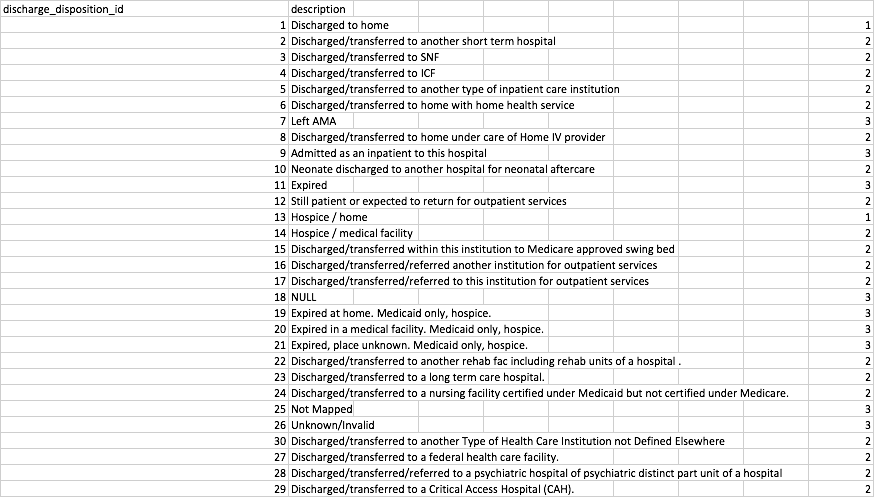

In [58]:

discharge_disposition_id_1_range = list([1, 13])
discharge_disposition_id_2_range = list([2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30])
discharge_disposition_id_3_range = list([7, 9, 11, 18, 19, 20, 21, 25, 26])

df_cleaned['discharge_disposition_id'] = df_cleaned['discharge_disposition_id'].replace(discharge_disposition_id_1_range, 1)
df_cleaned['discharge_disposition_id'] = df_cleaned['discharge_disposition_id'].replace(discharge_disposition_id_2_range, 2)
df_cleaned['discharge_disposition_id'] = df_cleaned['discharge_disposition_id'].replace(discharge_disposition_id_3_range, 3)




In [60]:
df_cleaned['discharge_disposition_id'].unique()

array([3, 1, 2], dtype=int64)

### Handle admission_source_id to less categories

- 1 for referral
- 2 for transfer
- 3 for emergency
- 4 for others
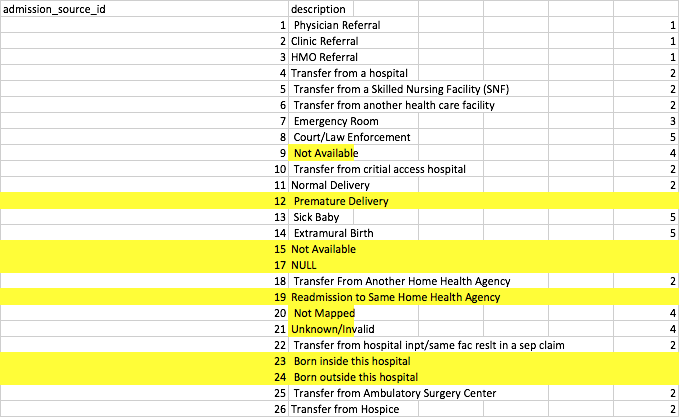

In [59]:
rangeSource = range(1, 27)
rangeSource_1 = [1, 2, 3]
rangeSource_2 = [4, 5, 6, 10, 11, 18, 22, 25, 26]
rangeSource_3 = [7]
rangeSource_4 = [a for a in rangeSource if a not in (rangeSource_1 + rangeSource_2 + rangeSource_3)]
df_cleaned['admission_source_id'] = df_cleaned['admission_source_id'].replace(rangeSource_1, 1)
df_cleaned['admission_source_id'] = df_cleaned['admission_source_id'].replace(rangeSource_2, 2)
df_cleaned['admission_source_id'] = df_cleaned['admission_source_id'].replace(rangeSource_3, 3)
df_cleaned['admission_source_id'] = df_cleaned['admission_source_id'].replace(rangeSource_4, 4)
df_cleaned['admission_source_id'] = df_cleaned['admission_source_id'].astype(float)


In [61]:
df_cleaned['admission_source_id'].unique()

array([1., 3., 2., 4.])

### Dummy coding of all the categorical variables

In [82]:
df_cleaned.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id         float64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
glimepiride                   int64
glipizide                     int64
glyburide                     int64
pioglitazone                

In [78]:
df_cleaned['insulin'].dtype.name

'int64'

In [85]:
df_cleaned['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Unknown', 'Asian',
       'Hispanic'], dtype=object)

In [88]:
df_cleaned['gender'].unique()

array([0, 1], dtype=int64)

In [89]:
df_cleaned['max_glu_serum'].unique()

array([-99,   1,   0], dtype=int64)

In [90]:
df_cleaned['A1Cresult'].unique()

array([-99,   1,   0], dtype=int64)

In [91]:
df_cleaned['change'].unique()

array([0, 1], dtype=int64)

In [92]:
df_cleaned['readmitted'].unique()

array([0, 1], dtype=int64)

In [95]:
df_cleaned['diabetesMed'].unique()

array([0, 1], dtype=int64)

In [93]:
df_cleaned['level1_diag1'].unique()

array([4., 0., 8., 1., 2., 5., 7., 6., 3.])

In [94]:
df_cleaned['service_utilization'].unique()

array([ 0,  3,  1,  2,  6, 10, 14,  4, 15,  5,  7, 12,  9,  8, 13, 18, 17,
       11, 25, 27, 23, 30, 16, 31, 19, 20, 21, 22, 49, 38, 26, 32, 24, 29,
       28, 35, 36, 61], dtype=int64)

In [84]:
?pd.get_dummies

In [96]:
dummies_race = pd.get_dummies(df_cleaned['race'], prefix="race")
dummies_gender = pd.get_dummies(df_cleaned['gender'], prefix="gender")
dummies_admission_type_id = pd.get_dummies(df_cleaned['admission_type_id'], prefix="admission_type_id")
dummies_admission_source_id = pd.get_dummies(df_cleaned['admission_source_id'], prefix="admission_source_id")
dummies_discharge_disposition_id = pd.get_dummies(df_cleaned['discharge_disposition_id'], prefix="discharge_disposition_id")
dummies_max_glu_serum = pd.get_dummies(df_cleaned['max_glu_serum'], prefix="max_glu_serum")
dummies_A1Cresult = pd.get_dummies(df_cleaned['A1Cresult'], prefix="A1Cresult")
dummies_change = pd.get_dummies(df_cleaned['change'], prefix="change")
dummies_diabetesMed = pd.get_dummies(df_cleaned['diabetesMed'], prefix="diabetesMed")
dummies_level1_diag1 = pd.get_dummies(df_cleaned['level1_diag1'], prefix="level1_diag1")
dummies_level2_diag2 = pd.get_dummies(df_cleaned['level2_diag2'], prefix="level2_diag2")
dummies_level3_diag3 = pd.get_dummies(df_cleaned['level3_diag3'], prefix="level3_diag3")


In [97]:
dummies = pd.concat([dummies_race, dummies_gender, dummies_admission_type_id, dummies_admission_source_id, \
                     dummies_discharge_disposition_id, dummies_max_glu_serum, dummies_A1Cresult, \
                     dummies_change, dummies_diabetesMed, dummies_level1_diag1, dummies_level2_diag2, \
                     dummies_level3_diag3], axis = 1)
df_dummies = pd.concat([df_cleaned, dummies], axis= 1)

In [9]:
pd.options.display.max_rows = 10

In [11]:
df_dummies

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,level2_diag2_8.0,level3_diag3_0.0,level3_diag3_1.0,level3_diag3_2.0,level3_diag3_3.0,level3_diag3_4.0,level3_diag3_5.0,level3_diag3_6.0,level3_diag3_7.0,level3_diag3_8.0
0,2278392,8222157,Caucasian,0,5,5,3,1.0,1,41,...,0,1,0,0,0,0,0,0,0,0
1,149190,55629189,Caucasian,0,15,1,1,3.0,3,59,...,0,1,0,0,0,0,0,0,0,0
2,64410,86047875,AfricanAmerican,0,25,1,1,3.0,2,11,...,0,1,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,1,35,1,1,3.0,2,44,...,0,0,1,0,0,0,0,0,0,0
4,16680,42519267,Caucasian,1,45,1,1,3.0,1,51,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101750,443824292,138784172,Caucasian,0,85,3,1,1.0,3,31,...,0,0,0,0,0,1,0,0,0,0
101753,443841992,184875899,Other,1,45,1,1,3.0,13,51,...,0,0,0,0,0,0,0,1,0,0
101754,443842016,183087545,Caucasian,0,75,1,1,3.0,9,50,...,0,0,0,0,0,1,0,0,0,0
101759,443842778,86472243,Caucasian,1,85,1,1,3.0,1,1,...,0,0,0,0,0,1,0,0,0,0


### Pick out the features from the dataset.

In [109]:
column_names = list(df_dummies.columns)

In [13]:
column_names_removed = ['encounter_id',
                        'patient_nbr',
                        'race',
                        'gender',
                        'admission_type_id', 
                        'discharge_disposition_id', 
                        'admission_source_id', 
                        'number_outpatient',
                        'number_emergency',
                        'number_inpatient',
                        'diag_1',
                        'diag_2',
                        'diag_3',
                        'max_glu_serum',
                        'A1Cresult',
                        'change',
                        'diabetesMed',
                        'level1_diag1',
                        'level2_diag2',
                        'level3_diag3',
                        'max_glu_serum_-99',
                        'A1Cresult_-99'
                       ]

columns_new = [name for name in column_names if name not in column_names_removed]
data_processed = df_dummies.loc[:, columns_new]
data_processed.to_csv("./processed_data.csv")
data_processed.shape
# [fruit for fruit in a if fruit not in b]

(37760, 73)

In [21]:
# remove further columns
column_names_removed2 = ['encounter_id',
                        'patient_nbr',
                        'race',
                        'gender',
                        'admission_type_id', 
                        'discharge_disposition_id', 
                        'admission_source_id', 
                        'diag_1',
                        'diag_2',
                        'diag_3',
                        'max_glu_serum',
                        'A1Cresult',
                        'change',
                        'diabetesMed',
                        'level1_diag1',
                        'level2_diag2',
                        'level3_diag3',
                        'max_glu_serum_0',
                        'max_glu_serum_-99',
                        'A1Cresult_0',
                        'A1Cresult_-99',
                        'change_0',
                        'diabetesMed_0',
                        'service_utilization'
                       ]

columns_new2 = [name for name in column_names if name not in column_names_removed2]
data_processed2 = df_dummies.loc[:, columns_new2]
data_processed2.to_csv("./processed_data2.csv")
data_processed2.shape
# [fruit for fruit in a if fruit not in b]

(37760, 71)

In [22]:
pd.options.display.max_rows = 10

In [23]:
data_processed2

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,...,level2_diag2_8.0,level3_diag3_0.0,level3_diag3_1.0,level3_diag3_2.0,level3_diag3_3.0,level3_diag3_4.0,level3_diag3_5.0,level3_diag3_6.0,level3_diag3_7.0,level3_diag3_8.0
0,5,1,41,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,15,3,59,0,18,0,0,0,9,0,...,0,1,0,0,0,0,0,0,0,0
2,25,2,11,5,13,2,0,1,6,0,...,0,1,0,0,0,0,0,0,0,0
3,35,2,44,1,16,0,0,0,7,0,...,0,0,1,0,0,0,0,0,0,0
4,45,1,51,0,8,0,0,0,5,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101750,85,3,31,2,24,0,0,0,9,0,...,0,0,0,0,0,1,0,0,0,0
101753,45,13,51,2,13,0,0,0,9,1,...,0,0,0,0,0,0,0,1,0,0
101754,75,9,50,2,33,0,0,0,9,0,...,0,0,0,0,0,1,0,0,0,0
101759,85,1,1,0,15,3,0,0,7,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
pd.options.display.max_rows = 10

In [18]:
data_processed2.dtypes

age                           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
number_diagnoses              int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
glimepiride                   int64
glipizide                     int64
glyburide                     int64
pioglitazone                  int64
rosiglitazone                 int64
acarbose                      int64
insulin                       int64
glyburide-metformin           int64
readmitted                    int64
race_AfricanAmerican          uint8
race_Asian                    uint8
race_Caucasian                uint8
race_Hispanic                 uint8
race_Other                    uint8
race_Unknown                  uint8
gender_1                    

### Remove outliers 

In [25]:
from sklearn.model_selection import train_test_split

In [123]:
numerical_columns = ['age', 
                     'time_in_hospital', 
                     'num_lab_procedures', 
                     'num_procedures', 
                     'num_medications',
                     'number_diagnoses',
                     'service_utilization'
                    ]

df_noOutlier = data_processed[(np.abs(sp.stats.zscore(data_processed[numerical_columns])) < 3).all(axis=1)]
df_noOutlier.shape

(34783, 73)

In [26]:
numerical_columns2 = ['age', 
                     'time_in_hospital', 
                     'num_lab_procedures', 
                     'num_procedures', 
                     'num_medications',
                     'number_outpatient',
                     'number_emergency',
                     'number_inpatient',
                     'number_diagnoses'
                    ]

df_noOutlier2 = data_processed2[(np.abs(sp.stats.zscore(data_processed2[numerical_columns2])) < 3).all(axis=1)]
df_noOutlier2.shape

(33643, 71)

### Normalisation between 0 and 1 

In [28]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [29]:
df_minmax2 = min_max_scaler.fit_transform(df_noOutlier2)

In [30]:
df_minmax2 = pd.DataFrame(df_minmax2, columns = df_noOutlier2.columns )

In [32]:
df_minmax2

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,gender_0,gender_1,admission_type_id_1,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_source_id_1.0,admission_source_id_2.0,admission_source_id_3.0,admission_source_id_4.0,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,max_glu_serum_1,A1Cresult_1,change_1,diabetesMed_1,level1_diag1_0.0,level1_diag1_1.0,level1_diag1_2.0,level1_diag1_3.0,level1_diag1_4.0,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0,level2_diag2_0.0,level2_diag2_1.0,level2_diag2_2.0,level2_diag2_3.0,level2_diag2_4.0,level2_diag2_5.0,level2_diag2_6.0,level2_diag2_7.0,level2_diag2_8.0,level3_diag3_0.0,level3_diag3_1.0,level3_diag3_2.0,level3_diag3_3.0,level3_diag3_4.0,level3_diag3_5.0,level3_diag3_6.0,level3_diag3_7.0,level3_diag3_8.0
0,0.000,0.181818,0.591837,0.0,0.472222,0.000000,0.000000,0.00,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.125,0.090909,0.102041,1.0,0.333333,0.666667,0.000000,0.25,0.416667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250,0.090909,0.438776,0.2,0.416667,0.000000,0.000000,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.375,0.000000,0.510204,0.0,0.194444,0.000000,0.000000,0.00,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.750,0.363636,0.734694,0.0,0.305556,0.000000,0.000000,0.00,0.583333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33638,0.750,0.181818,0.265306,0.2,0.777778,0.000000,0.333333,0.00,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33639,0.875,0.181818,0.306122,0.4,0.638889,0.000000,0.000000,0.00,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33640,0.750,0.727273,0.500000,0.4,0.888889,0.000000,0.000000,0.00,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

## 🔆🔆🔆❗️ Split the dataset into train and test

In [33]:
from sklearn.model_selection import train_test_split
y = df_minmax2.loc[ : , 'readmitted']
x = df_minmax2.drop(['readmitted'], axis = 1)

In [165]:
x_array = x.values

In [166]:
x_array

array([[0.        , 0.18181818, 0.59183673, ..., 0.        , 0.        ,
        0.        ],
       [0.125     , 0.09090909, 0.10204082, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.09090909, 0.43877551, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.75      , 0.72727273, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.875     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 0.18181818, 0.51020408, ..., 0.        , 0.        ,
        0.        ]])

In [167]:
y_array = y.values

In [168]:
y_array

array([0., 0., 0., ..., 0., 0., 0.])

In [186]:
y_int = y_array.astype(int)

In [187]:
y_int

array([0, 0, 0, ..., 0, 0, 0])

In [196]:
y_int.shape

(33643,)

In [197]:
x_array.shape

(33643, 70)

In [217]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(x_array, y_int, test_size=0.3, random_state=88)

In [218]:
X_train3.shape

(23550, 70)

In [219]:
Y_train3.shape

(23550,)

In [225]:
Y_train3

array([0, 0, 0, ..., 0, 0, 0])

In [220]:
X_test3.shape

(10093, 70)

In [223]:
Y_test3.shape

(10093,)

In [224]:
Y_test3

array([0, 0, 0, ..., 0, 0, 0])

### Previous Data Manipulataion

In [ ]:
# XY train test 2 are in data frame; XY train test 3 are in array
# ravel turns df into array
# dtypes work for df only

In [205]:
Y_train2.values.ravel()

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
Y_train2.dtypes

dtype('float64')

In [127]:
Y_int = Y_train2.astype(int)

In [135]:
Y_int.dtypes

dtype('int32')

In [134]:
Y_int.values.ravel()

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
Y_int.value_counts()

0    21152
1     2398
Name: readmitted, dtype: int64

In [41]:
X_train2.to_csv("./X_train2.csv")
Y_train2.to_csv("./Y_train2.csv")
X_test2.to_csv("./X_test2.csv")
Y_test2.to_csv("./Y_test2.csv")

### Correlation matrix

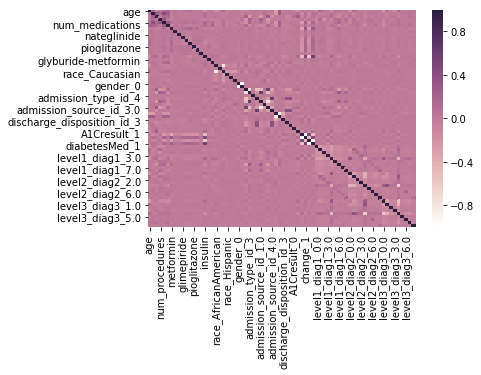

In [154]:
import seaborn as sns
sns.heatmap(X_train.corr(), cmap=sns.cubehelix_palette(light=1, as_cmap=True))

### Balance the train dataset

In [155]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape {}'.format(Counter(Y_train)))
# Print how many 0 and 1 in the Y output column

Original dataset shape Counter({0.0: 21809, 1.0: 2539})


In [156]:
smt = SMOTE(random_state=20)
X_train_balanced, Y_train_balanced = smt.fit_sample(X_train, Y_train)

print('New dataset shape {}'.format(Counter(Y_train_balanced)))

New dataset shape Counter({0.0: 21809, 1.0: 21809})


In [158]:
# Convert balanced arrays back to data frame
X_train_bal = pd.DataFrame(X_train_balanced, columns=X_train.columns)
Y_train_bal = pd.DataFrame(Y_train_balanced, columns=['readmitted'])

In [160]:
X_train_bal.shape

(43618, 72)

In [162]:
Y_train_bal.shape

(43618, 1)

In [166]:
X_train_bal.to_csv("./X_train_bal.csv")
Y_train_bal.to_csv("./Y_train_bal.csv")

## 🔆🔆🔆❗️Start modeling

## 1. Support Vector Machine

In [255]:
### SVMs with default parameters
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import recall_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

In [151]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

### Simple SVM Model

In [170]:
model_svc1 = SVC(kernel='rbf', C=1, gamma='auto')
model_svc1.fit(X_train_bal, Y_train_bal.values.ravel())
model_svc1

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
pred_svc1 = model_svc1.predict(X_test)
print("Model 1 Results: \n", classification_report(Y_test, pred_svc1))

Model 1 Results: 
              precision    recall  f1-score   support

        0.0       0.91      0.81      0.86      9301
        1.0       0.19      0.36      0.25      1134

avg / total       0.83      0.76      0.79     10435



In [177]:
accuracy_score(Y_test, pred_svc1)

0.7635840919980834

AUC = 0.5866892524689178


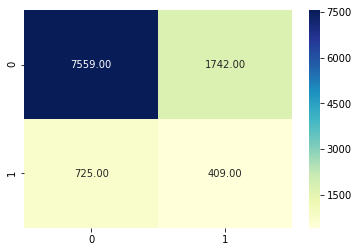

In [184]:
cm = confusion_matrix(Y_test, pred_svc1)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2f')
print("AUC =",roc_auc_score(Y_test, pred_svc1))

### First GridSearch

In [188]:
parameters = {'C':[1, 10, 100, 1000],
               'gamma':[0.1 , 0.01 , 0.001 , 0.0001],
             'kernel':['sigmoid', 'rbf', 'poly']}

In [190]:
model_svc2 = GridSearchCV(cv = 3, estimator=SVC(decision_function_shape='ovo', class_weight="balanced"), param_grid=parameters, verbose=2)
model_svc2.fit(X_train_bal, Y_train_bal.values.ravel())
print(model_svc2)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total= 2.0min
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total= 1.9min
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total= 2.3min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total= 1.5min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total= 1.8min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total= 1.8min
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total= 2.0min
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total= 2.1min
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] .

[CV] .................... C=10, gamma=0.001, kernel=rbf, total= 2.9min
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total= 2.5min
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total= 2.6min
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total= 2.7min
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] ............... C=10, gamma=0.0001, kernel=sigmoid, total= 2.8min
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] ............... C=10, gamma=0.0001, kernel=sigmoid, total= 3.0min
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] ............... C=10, gamma=0.0001, kernel=sigmoid, total= 2.9min
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] ............... C=1000, gamma=0.01, kernel=sigmoid, total= 1.9min
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV] ............... C=1000, gamma=0.01, kernel=sigmoid, total= 3.2min
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV] ............... C=1000, gamma=0.01, kernel=sigmoid, total= 2.9min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total= 3.1min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total= 8.3min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total= 8.3min
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] .................. C=1000, gamma=0.01, kernel=poly, total= 1.9min
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 614.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['sigmoid', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)


In [192]:
print("Best parameters for the C and gamma: %s" % model_svc2.best_params_)

Best parameters for the C and gamma: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [193]:
print("Best parameters accuracy for validation: %s" % model_svc2.best_score_)

Best parameters accuracy for validation: 0.9019212251822643


In [197]:
print("Best parameters estimator: %s" % model_svc2.best_estimator_)

Best parameters estimator: SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [198]:
print("CV Results: %s" % model_svc2.cv_results_)

CV Results: {'mean_fit_time': array([103.80368082,  77.26837961, 102.88803188, 115.63002912,
       123.05670826, 117.73909664, 124.650817  , 133.47749941,
       126.28408559, 138.14338446, 150.4077363 , 120.63121136,
       120.82019377, 157.69596275, 243.10662651, 109.67914303,
        87.81494339, 108.05311577, 115.0211157 , 129.19456307,
       120.05698911, 132.07035661, 143.31970954, 130.81619302,
       112.92390474, 282.42519387, 502.85002192, 154.12971187,
       135.18115592, 110.3059516 , 116.40847762, 126.28432473,
       127.94723026, 114.24641911, 127.28093696, 115.03477605,
        76.51124708, 306.7390093 , 868.91236909, 139.35905997,
       378.81917413,  99.07745934, 161.37098877, 181.44402258,
       114.75374381, 104.94037994, 114.70458786, 115.10414688]), 'std_fit_time': array([ 10.80490897,   7.34799311,   1.78829665,   2.94414388,
         3.2277269 ,   2.48298325,   2.88315432,   2.73314385,
         9.56396721,   3.88623862,   1.72173517,   0.55032855,
       

In [194]:
model_svc2.grid_scores_

C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.52231, std: 0.00461, params: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'},
 mean: 0.87010, std: 0.05455, params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 mean: 0.84607, std: 0.02689, params: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'},
 mean: 0.63180, std: 0.00377, params: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'},
 mean: 0.71454, std: 0.01486, params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.56541, std: 0.00090, params: {'C': 1, 'gamma': 0.01, 'kernel': 'poly'},
 mean: 0.58957, std: 0.00402, params: {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'},
 mean: 0.61280, std: 0.00227, params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.56541, std: 0.00090, params: {'C': 1, 'gamma': 0.001, 'kernel': 'poly'},
 mean: 0.59283, std: 0.00289, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'},
 mean: 0.59276, std: 0.00139, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.56541, std: 0.00090, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'},
 mean: 0.52215

In [195]:
pred_svc2 = model_svc2.predict(X_test)
print("Model 2 Results: \n", classification_report(Y_test, pred_svc2))

Model 2 Results: 
              precision    recall  f1-score   support

        0.0       0.90      0.90      0.90      9301
        1.0       0.15      0.15      0.15      1134

avg / total       0.82      0.82      0.82     10435



AUC = 0.5225742353470555


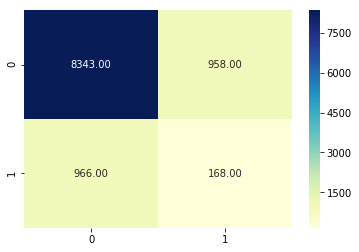

In [196]:
cm = confusion_matrix(Y_test, pred_svc2)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2f')
print("AUC =",roc_auc_score(Y_test, pred_svc2))

In [209]:
print('Predicted Values {}'.format(Counter(pred_svc2)))

Predicted Values Counter({0.0: 9309, 1.0: 1126})


In [210]:
print('Reference Values {}'.format(Counter(Y_test)))

Reference Values Counter({0.0: 9301, 1.0: 1134})


In [212]:
recall_score(Y_test, pred_svc2, average='binary', pos_label=1 )

0.14814814814814814

### Second GridSearch

In [43]:
parameters2 = {'C':[10, 100],
               'gamma':[0.1, 0.01],
             'kernel':['rbf']}

In [44]:
model_svc3 = GridSearchCV(cv = 3, estimator=SVC(decision_function_shape='ovo', class_weight="balanced"),\
                          param_grid=parameters2, verbose=2)

model_svc3.fit(X_train2, Y_train2.values.ravel())
print(model_svc3)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  52.4s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  50.5s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  48.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  47.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  47.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  47.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total= 1.5min
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total= 1.5min
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 15.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100], 'gamma': [0.1, 0.01], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)


In [45]:
print("Best parameters for the C and gamma: %s" % model_svc3.best_params_)

Best parameters for the C and gamma: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [46]:
print("Best parameters accuracy for validation: %s" % model_svc3.best_score_)

Best parameters accuracy for validation: 0.8070488322717622


In [47]:
print("Best parameters estimator: %s" % model_svc3.best_estimator_)

Best parameters estimator: SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [220]:
print("CV Results: %s" % model_svc3.cv_results_)

CV Results: {'mean_fit_time': array([21.17683029, 23.74794197]), 'std_fit_time': array([0.42942476, 0.20891547]), 'mean_score_time': array([10.38418901,  7.12377107]), 'std_score_time': array([0.18501985, 0.46032989]), 'param_C': masked_array(data=[10, 100],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, 0.1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'rbf'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}], 'split0_test_score': array([0.26929134, 0.16850394]), 'split1_test_score': array([0.27423168, 0.17100079]), 'mean_test_score': array([0.27176131, 0.16975226]), 'std_test_score': array([0.00247017, 0.00124843]), 'rank_test_score': array([1, 2]), 'split0_train_score': array([0.97951143, 0.99921198]

In [48]:
model_svc3.grid_scores_

C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.75185, std: 0.00165, params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 mean: 0.65652, std: 0.00311, params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.80705, std: 0.00272, params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 mean: 0.65512, std: 0.00009, params: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}]

In [49]:
pred_svc3 = model_svc3.predict(X_test2)
print("Model 3 Results: \n", classification_report(Y_test2, pred_svc3))

Model 3 Results: 
              precision    recall  f1-score   support

        0.0       0.90      0.86      0.88      9051
        1.0       0.13      0.18      0.15      1042

avg / total       0.82      0.79      0.81     10093



AUC = 0.5214894442263727


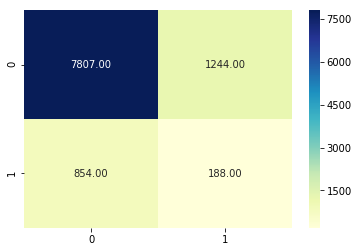

In [50]:
cm = confusion_matrix(Y_test2, pred_svc3)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2f')
print("AUC =", roc_auc_score(Y_test2, pred_svc3))

### Third GridSearch

In [51]:
parameters3 = {'C':[10, 100],
               'gamma':[0.1, 0.01],
             'kernel':['rbf']}

In [52]:
model_svc4 = GridSearchCV(cv = 3, estimator=SVC(decision_function_shape='ovo', class_weight="balanced"),\
                          param_grid=parameters3, verbose=2, scoring='recall')

model_svc4.fit(X_train2, Y_train2.values.ravel())
print(model_svc4)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  55.5s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  51.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  50.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  48.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  48.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  47.7s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total= 1.5min
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total= 1.5min
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 15.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100], 'gamma': [0.1, 0.01], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=2)


In [53]:
print("Best parameters for the C and gamma: %s" % model_svc4.best_params_)

Best parameters for the C and gamma: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [55]:
print("Best parameters recall for validation: %s" % model_svc4.best_score_)

Best parameters recall for validation: 0.5663021711720329


In [56]:
print("Best parameters estimator: %s" % model_svc4.best_estimator_)

Best parameters estimator: SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [57]:
print("CV Results: %s" % model_svc4.cv_results_)

CV Results: {'mean_fit_time': array([43.99960287, 37.42276772, 83.66146572, 49.88284938]), 'std_fit_time': array([2.32431795, 0.3466611 , 1.27906659, 0.64044897]), 'mean_score_time': array([ 8.33524664, 10.75629544,  5.44648759,  9.83151865]), 'std_score_time': array([0.21190778, 0.09689139, 0.1090551 , 0.07163078]), 'param_C': masked_array(data=[10, 10, 100, 100],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, 0.01, 0.1, 0.01],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}], 'split0_test_score': array([0.3  

In [58]:
model_svc4.grid_scores_

C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.31527, std: 0.01122, params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 mean: 0.56630, std: 0.01016, params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.17807, std: 0.01400, params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 mean: 0.53294, std: 0.00516, params: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}]

In [59]:
pred_svc4 = model_svc4.predict(X_test2)
print("Model 4 Results: \n", classification_report(Y_test2, pred_svc4))

Model 4 Results: 
              precision    recall  f1-score   support

        0.0       0.93      0.66      0.77      9051
        1.0       0.16      0.58      0.25      1042

avg / total       0.85      0.65      0.72     10093



AUC = 0.6178399710236576


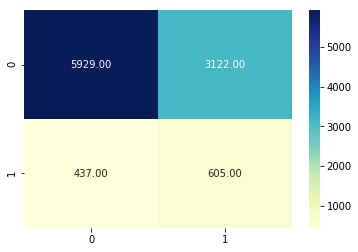

In [60]:
cm = confusion_matrix(Y_test2, pred_svc4)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2f')
print("AUC =", roc_auc_score(Y_test2, pred_svc4))

### Fourth GridSearch

#### Find the optimum weight

In [228]:
weights = np.linspace(0.1, 0.9, 5)

In [229]:
weights

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [230]:
model_wt1 = GridSearchCV(
    estimator=SVC(),
    param_grid={'class_weight': [{0: i, 1: 1.0-i} for i in weights]},
    scoring='f1',
    cv=3,
    verbose=0
)

In [231]:
model_wt1

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.30000000000000004, 1: 0.7}, {0: 0.5, 1: 0.5}, {0: 0.7000000000000001, 1: 0.29999999999999993}, {0: 0.9, 1: 0.09999999999999998}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [232]:
wt_result1 = model_wt1.fit(X_train3, Y_train3)

C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

In [233]:
wt_result1

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.30000000000000004, 1: 0.7}, {0: 0.5, 1: 0.5}, {0: 0.7000000000000001, 1: 0.29999999999999993}, {0: 0.9, 1: 0.09999999999999998}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [234]:
print("Best parameters : %s" % wt_result1.best_params_)

Best parameters : {'class_weight': {0: 0.1, 1: 0.9}}


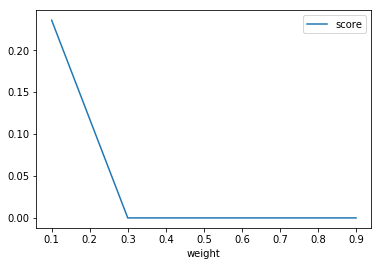

In [235]:
dataz = pd.DataFrame({ 'score': wt_result1.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

#### Use the optimum weight for modelling

In [236]:
parameters4 = {'C':[10, 100],
               'gamma':[0.1, 0.01],
             'kernel':['rbf']}

In [237]:
model_svc5 = GridSearchCV(cv = 3, estimator=SVC(class_weight={0: 0.1, 1: 0.9}), param_grid=parameters4,\
                          verbose=0, scoring='f1')

model_svc5.fit(X_train3, Y_train3)
print(model_svc5)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight={0: 0.1, 1: 0.9}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100], 'gamma': [0.1, 0.01], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)


In [238]:
print("Best parameters for the C and gamma: %s" % model_svc5.best_params_)

Best parameters for the C and gamma: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [239]:
print("Best parameters f1 for validation: %s" % model_svc5.best_score_)

Best parameters f1 for validation: 0.2507377571501052


In [240]:
print("Best parameters estimator: %s" % model_svc5.best_estimator_)

Best parameters estimator: SVC(C=10, cache_size=200, class_weight={0: 0.1, 1: 0.9}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [241]:
print("CV Results: %s" % model_svc5.cv_results_)

CV Results: {'mean_fit_time': array([35.04089093, 40.19641733, 57.21312435, 35.91853611]), 'std_fit_time': array([0.31895569, 1.10472263, 0.50134129, 0.4743361 ]), 'mean_score_time': array([10.53757612, 11.84516144,  7.21033978, 10.58204826]), 'std_score_time': array([0.65120804, 0.47372533, 0.09001804, 0.07642621]), 'param_C': masked_array(data=[10, 10, 100, 100],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, 0.01, 0.1, 0.01],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}], 'split0_test_score': array([0.245

In [242]:
model_svc5.grid_scores_

C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.24031, std: 0.00584, params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 mean: 0.25074, std: 0.00352, params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.18261, std: 0.00477, params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 mean: 0.24951, std: 0.00207, params: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}]

In [243]:
pred_test5 = model_svc5.predict(X_test3)

In [259]:
pred_test5

array([0, 0, 0, ..., 0, 0, 0])

In [244]:
print("Model test Results: \n", classification_report(Y_test3, pred_test5))

Model test Results: 
              precision    recall  f1-score   support

          0       0.93      0.66      0.77      9051
          1       0.16      0.57      0.25      1042

avg / total       0.85      0.65      0.71     10093



(<matplotlib.figure.Figure at 0x2458e177898>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2458bdee2b0>)

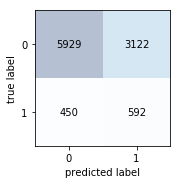

In [245]:
plot_confusion_matrix(confusion_matrix(Y_test3, pred_test5))

In [246]:
roc_auc_score(Y_test3, pred_test5)

0.611601967184886

In [257]:
roc_curve(Y_test3, pred_test5)

(array([0.        , 0.34493426, 1.        ]),
 array([0.       , 0.5681382, 1.       ]),
 array([2, 1, 0]))

###  Predict Proba

In [249]:
model_svc6 = SVC(class_weight={0: 0.1, 1: 0.9}, probability=True, C=10.0, \
                 gamma=0.01, kernel='rbf')
print(model_svc6)
model_svc6.fit(X_train3, Y_train3)

SVC(C=10.0, cache_size=200, class_weight={0: 0.1, 1: 0.9}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


SVC(C=10.0, cache_size=200, class_weight={0: 0.1, 1: 0.9}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [250]:
pred_test6 = model_svc6.predict_proba(X_test3)

In [85]:
pred_test6[ : , 1]

array([0.0541386 , 0.05852976, 0.06049842, ..., 0.06191314, 0.0797354 ,
       0.079671  ])

In [87]:
pred_test6

array([[0.9458614 , 0.0541386 ],
       [0.94147024, 0.05852976],
       [0.93950158, 0.06049842],
       ...,
       [0.93808686, 0.06191314],
       [0.9202646 , 0.0797354 ],
       [0.920329  , 0.079671  ]])

In [86]:
print("Model test Results: \n", classification_report(Y_test3, pred_test6))

ValueError: Mix type of y not allowed, got types {'binary', 'continuous-multioutput'}

In [252]:
plot_confusion_matrix(confusion_matrix(Y_test3, pred_test6))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [253]:
roc_auc_score(Y_test3, pred_test6)

ValueError: bad input shape (10093, 2)

In [256]:
roc_curve(Y_test3, pred_test6)

ValueError: bad input shape (10093, 2)

### 1. Logistics Regression

In [37]:
import statsmodels.api as sm

X_train, X_dev, Y_train, Y_dev = train_test_split(X_train_bal, y_train_bal, test_size=0.20, random_state=0)
logit = sm.Logit(Y_train, X_train)
result = logit.fit()
print(result.summary2())


C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.660027
         Iterations 5
                                      Results: Logit
Model:                       Logit                    No. Iterations:           5.0000    
Dependent Variable:          readmitted               Pseudo R-squared:         0.048     
Date:                        2018-05-24 16:16         AIC:                      86004.5008
No. Observations:            65078                    BIC:                      86449.5846
Df Model:                    48                       Log-Likelihood:           -42953.   
Df Residuals:                65029                    LL-Null:                  -45108.   
Converged:                   1.0000                   Scale:                    1.0000    
------------------------------------------------------------------------------------------
                            Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
--------------------------

### 2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [76]:
model_dt1 = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10, class_weight='balanced')
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(model_dt1, X_train3, Y_train3, cv=10))))

Cross Validation score: 74.64%


In [77]:
model_dt1.fit(X_train3, Y_train3)
print(model_dt1)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=28, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [78]:
print("Dev Set score: {:.2%}".format(model_dt1.score(X_test3, Y_test3)))

Dev Set score: 74.52%


In [79]:
pred_dt1 = model_dt1.predict(X_test3)

In [80]:
(pred_dt1 == 0).sum()

8007

In [81]:
(pred_dt1 == 1).sum()

2086

In [82]:
print("Model test Results: \n", classification_report(Y_test3, pred_dt1))

Model test Results: 
              precision    recall  f1-score   support

          0       0.90      0.80      0.85      9051
          1       0.13      0.27      0.18      1042

avg / total       0.82      0.75      0.78     10093



(<matplotlib.figure.Figure at 0x183137a9278>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18313791da0>)

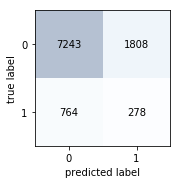

In [83]:
plot_confusion_matrix(confusion_matrix(Y_test3, pred_dt1))

In [67]:
roc_auc_score(Y_test3, pred_dt1)

0.5286683733528771

In [224]:

import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dte, out_file="dt_q2.dot", feature_names=X_train.columns, max_depth=4, class_names=["No","Readm"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())

NameError: name 'dte' is not defined

###  3. Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_rf1 = RandomForestClassifier(n_estimators = 1000, random_state = 42, class_weight={0: 0.1, 1: 0.9})

In [57]:
(Y_train3 == 0).sum()

21152

In [58]:
(Y_train3 == 1).sum()

2398

In [42]:
model_rf1.fit(X_train3, Y_train3);
print(model_rf1)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


In [43]:
pred_rf1 = model_rf1.predict(X_test3)

In [48]:
pred_rf1

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
(pred_rf1 == 0).sum()

10093

In [50]:
(pred_rf1 == 1).sum()

0

In [45]:
print("Model test Results: \n", classification_report(Y_test3, pred_rf1))

Model test Results: 
              precision    recall  f1-score   support

          0       0.90      1.00      0.95      9051
          1       0.00      0.00      0.00      1042

avg / total       0.80      0.90      0.85     10093



C:\Users\siew.yh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(<matplotlib.figure.Figure at 0x183160dc7f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x183160dc1d0>)

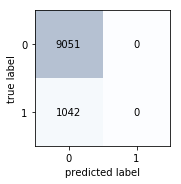

In [46]:
plot_confusion_matrix(confusion_matrix(Y_test3, pred_rf1))

In [24]:
roc_auc_score(Y_test3, pred_rf1)

0.5004798464491362

In [25]:
roc_curve(Y_test3, pred_rf1)

(array([0., 1.]), array([9.59692898e-04, 1.00000000e+00]), array([1, 0]))

In [40]:
import dill
dill.dump_session('diabetes_env.db')